# Sprint 自然言語処理入門

## 1.このSprintについて

### Sprintの目的
- 自然言語処理の一連の流れを学ぶ
- 自然言語のベクトル化の方法を学ぶ

### どのように学ぶか
自然言語処理定番のデータセットを用いて、一連の流れを見ていきます。

## 2.自然言語のベクトル化

**自然言語処理（NLP, Natural Language Processing）** とは人間が普段使っている **自然言語** をコンピュータに処理させる技術のことです。ここではその中でも、機械学習の入力として自然言語を用いることを考えていきます。

多くの機械学習手法は **数値データ（量的変数）** の入力を前提にしていますので、自然言語の **テキストデータ** を数値データに変換する必要があります。これを **自然言語のベクトル化** と呼びます。ベクトル化の際にテキストデータの特徴をうまく捉えられるよう、様々な手法が考えられてきていますので、このSprintではそれらを学びます。

### 非構造化データ
データの分類として、表に数値がまとめられたようなコンピュータが扱いやすい形を **構造化データ** 、人間が扱いやすい画像・動画・テキスト・音声などを **非構造化データ** と呼ぶことがあります。自然言語のベクトル化は、非構造化データを構造化データに変換する工程と言えます。同じ非構造化データでも、画像に対してはディープラーニングを用いる場合この変換作業はあまり必要がありませんでしたが、テキストにおいてはこれをどう行うかが重要です。

### 自然言語処理により何ができるか
機械学習の入力や出力に自然言語のテキストを用いることで様々なことができます。入力も出力もテキストである例としては **機械翻訳** があげられ、実用化されています。入力は画像で出力がテキストである **画像キャプション生成** やその逆の文章からの画像生成も研究が進んでいます。

しかし、出力をテキストや画像のような非構造化データとすることは難易度が高いです。比較的簡単にできることとしては、入力をテキスト、出力をカテゴリーとする **テキスト分類** です。

アヤメやタイタニック、手書き数字のような定番の存在として、**IMDB映画レビューデータセット** の感情分析があります。レビューの文書が映画に対して肯定的か否定的かを2値分類します。文書ごとの肯定・否定はラベルが与えられています。このSprintではこれを使っていきます。

## 3.IMDB映画レビューデータセットの準備

IMDB映画レビューデータセットを準備します。

### ダウンロード
次のwgetコマンドによってダウンロードします。

以下のサイトで公開されているデータセットです。

[Sentiment Analysis](http://ai.stanford.edu/~amaas/data/sentiment/)

In [1]:
%cd /Users/ikeda/Desktop/dive/diveintocode-ml/Downlowd_data

/Users/ikeda/Desktop/dive/diveintocode-ml/Downlowd_data


In [2]:
# # IMDBをカレントフォルダにダウンロード
# !wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# # 解凍
# !tar zxf aclImdb_v1.tar.gz
# # aclImdb/train/unsupはラベル無しのため削除
# !rm -rf aclImdb/train/unsup
# IMDBデータセットの説明を表示
!cat aclImdb/README

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an additional 50,000 unlabeled
documents for unsupervised learning. 

In the entire collection, no more than 30 reviews are allowed for any
given movie because reviews for the same movie tend to have correlated
ratings. Further, the train and test sets contain a disjoint set of
movies, so no significant performance is obtained by memorizing
movie-unique terms and their associated with observed labels.  In the
labeled train/test sets, a negative review has a score <= 4 out of 10,
and a positive review has a scor

### 読み込み

scikit-learnのload_filesを用いて読み込みます。

[sklearn.datasets.load_files — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_files.html)

**《読み込むコード》**

In [3]:
from sklearn.datasets import load_files
train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target
test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target
# ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['neg', 'pos']


### このデータセットについて
中身を見てみると、英語の文章が入っていることが分かります。

In [4]:
print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


IMDBはInternet Movie Databaseの略で、映画のデータベースサイトです。

[Ratings and Reviews for New Movies and TV Shows - IMDb](https://www.imdb.com/)

このサイトではユーザーが映画に対して1から10点の評価とコメントを投稿することができます。そのデータベースから訓練データは25000件、テストデータは25000件のデータセットを作成しています。

4点以下を否定的、7点以下を肯定的なレビューとして2値のラベル付けしており、これにより感情の分類を行います。5,6点の中立的なレビューはデータセットに含んでいません。また、ラベルは訓練用・テスト用それぞれで均一に入っています。詳細はダウンロードしたREADMEを確認してください。

## 4.古典的な手法

古典的ながら現在でも強力な手法であるBoWとTF-IDFを見ていきます。

## 5.BoW

単純ながら効果的な方法として **BoW (Bag of Words)** があります。これは、サンプルごとに単語などの **登場回数** を数えたものをベクトルとする方法です。単語をカテゴリとして捉え one-hot表現 していることになります。

### 例
例として、IMDBデータセットからある3文の最初の5単語を抜き出したものを用意しました。

In [5]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

この3文にBoWを適用させてみます。scikit-learnのCountVectorizerを利用します。

[sklearn.feature_extraction.text.CountVectorizer — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()
# DataFrameにまとめる
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


例にあげた3文の中で登場する8種類の単語が列名になり、0,1,2番目のサンプルでそれらが何回登場しているかを示しています。2番目のサンプル「Very bad. Very, very bad.」ではbadが2回、veryが3回登場しています。列名になっている言葉はデータセットが持つ **語彙** と呼びます。

テキストはBoWにより各サンプルが語彙数の次元を持つ特徴量となり、機械学習モデルへ入力できるようになります。この時使用したテキスト全体のことを **コーパス** と呼びます。語彙はコーパスに含まれる言葉よって決まり、それを特徴量としてモデルの学習を行います。そのため、テストデータではじめて登場する語彙はベクトル化される際に無視されます。

### 前処理
CountVectorizerクラスでは大文字は小文字に揃えるという **前処理** が自動的に行われています。こういった前処理は自然言語処理において大切で、不要な記号などの消去**（テキストクリーニング）**や表記揺れの統一といったことを別途行うことが一般的です。

語形が「see」「saw」「seen」のように変化する単語に対して語幹に揃える **ステミング** と呼ばれる処理を行うこともあります。

### トークン
BoWは厳密には単語を数えているのではなく、 **トークン（token）** として定めた固まりを数えます。

何をトークンとするかはCountVectorizerでは引数`token_pattern`で **正規表現** の記法により指定されます。デフォルトは`r'(?u)\b\w\w+\b'`ですが、上の例では`r'(?u)\b\w+\b'`としています。

デフォルトでは空白・句読点・スラッシュなどに囲まれた2文字以上の文字を1つのトークンとして抜き出すようになっているため、「a」や「I」などがカウントされません。英語では1文字の単語は文章の特徴をあまり表さないため、除外されることもあります。しかし、上の例では1文字の単語もトークンとして抜き出すように引数を指定しています。

#### 《正規表現》

正規表現は前処理の際にも活用しますが、ここでは詳細は扱いません。Pythonではreモジュールによって正規表現操作ができます。

[re — 正規表現操作](https://docs.python.org/ja/3/library/re.html)

正規表現を利用する際はリアルタイムで結果を確認できる以下のようなサービスが便利です。

[Online regex tester and debugger: PHP, PCRE, Python, Golang and JavaScript](https://regex101.com/)

### 形態素解析

英語などの多くの言語では空白という分かりやすい基準でトークン化が行えますが、日本語ではそれが行えません。

日本語では名詞や助詞、動詞のように異なる **品詞** で分けられる単位で **分かち書き** することになります。例えば「私はプログラミングを学びます」という日本語の文は「私/は/プログラミング/を/学び/ます」という風になります。

これには **MeCab** や **Janome** のような形態素解析ツールを用います。Pythonから利用することも可能です。MeCabをウェブ上で簡単に利用できる[Web茶まめ](http://chamame.ninjal.ac.jp/)というサービスも国立国語研究所が提供しています。

自然言語では新しい言葉も日々生まれますので、それにどれだけ対応できるかも大切です。MeCab用の毎週更新される辞書として **mecab-ipadic-NEologd** がオープンソースで存在しています。

[mecab-ipadic-neologd/README.ja.md at master · neologd/mecab-ipadic-neologd](https://github.com/neologd/mecab-ipadic-neologd/blob/master/README.ja.md)

### n-gram
上のBoWの例では1つの単語（トークン）毎の登場回数を数えましたが、これでは語順は全く考慮されていません。

考慮するために、隣あう単語同士をまとめて扱う **n-gram** という考え方を適用することがあります。2つの単語をまとめる場合は **2-gram (bigram)** と呼び、次のようになります。

In [7]:
# ngram_rangeで利用するn-gramの範囲を指定する
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


2-gramにより「very good」と「very bad」が区別して数えられています。

単語をまとめない場合は **1-gram (unigram)** と呼びます。3つまとめる3-gram(trigram)など任意の数を考えることができます。1-gramと2-gramを組み合わせてBoWを行うといったこともあります。

## 【問題1】BoWのスクラッチ実装
以下の3文のBoWを求められるプログラムをscikit-learnを使わずに作成してください。1-gramと2-gramで計算してください。
```
This movie is SOOOO funny!!!
What a movie! I never
best movie ever!!!!! this movie
```

In [8]:
dataset = \
  ["This movie is SOOOO funny!!!",
  "What a movie! I never",
  "best movie ever!!!!! this movie"]

In [9]:
import re
import pandas as pd
from collections import defaultdict

class ScratchBoW():
    def __init__(self, token_pattern=r'(?u)\b\w\w+\b', ngram_range=(1, 1)):
        self.token_pattern = token_pattern
        self.ngram_range = ngram_range
    
    def fit_transform(self, dataset):
        '''
        dataset : 文のリスト　str
        '''
        bow_df = pd.DataFrame()
        min_n, max_n = self.ngram_range
        token_pattern = re.compile(self.token_pattern)
        for i, sentence in enumerate(dataset):
            #　sentenceを全て小文字に変換
            sentence = sentence.lower()
            # 正規表現で変換
            token_list = token_pattern.findall(sentence)
            word_count = len(token_list)
            d = defaultdict(int)
            for j in range(word_count):
                for k in range(max_n-min_n+1):
                    if j+min_n+k <= word_count:
                        words = token_list[j:j+min_n+k]
                        words = ' '.join(words)
                        # print(words)
                        d[words] += 1
            # print(d)
            d_df = pd.DataFrame(d, index=[i])
            bow_df = pd.concat([bow_df, d_df], axis=0)
        bow_df = bow_df.fillna(0).astype(int)
        return bow_df

In [10]:
bow = ScratchBoW(token_pattern=r'(?u)\b\w+\b', ngram_range=(1, 1))
bow.fit_transform(dataset)

,this,movie,is,soooo,funny,what,a,i,never,best,ever
0,1,1,1,1,1,0,0,0,0,0,0
1,0,1,0,0,0,1,1,1,1,0,0
2,1,2,0,0,0,0,0,0,0,1,1


In [11]:
bow = ScratchBoW(token_pattern=r'(?u)\b\w+\b', ngram_range=(2, 2))
bow.fit_transform(dataset)

,this movie,movie is,is soooo,soooo funny,what a,a movie,movie i,i never,best movie,movie ever,ever this
0,1,1,1,1,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,0,0,0
2,1,0,0,0,0,0,0,0,1,1,1


## 6.TF-IDF

BoWの発展的手法として **TF-IDF** もよく使われます。これは **Term Frequency (TF) **と **Inverse Document Frequency (IDF)** という2つの指標の組み合わせです。

**《標準的なTF-IDFの式》**

Term Frequency:

$$
tf(t,d) = \frac{n_{t,d}}{\sum_{s \in d}n_{s,d}}
$$

$n_{t,d}$ : サンプルd内のトークンtの出現回数（BoWと同じ）

$\sum_{s \in d}n_{s,d}$ : サンプルdの全トークンの出現回数の和

Inverse Document Frequency:

$$
idf(t) = \log{\frac{N}{df(t)}}
$$

$N$ : サンプル数

$df(t)$ : トークンtが出現するサンプル数

＊logの底は任意の値

TF-IDF:

$$
tfidf(t, d) = tf(t, d) \times idf(t)
$$

### IDF
IDFはそのトークンがデータセット内で珍しいほど値が大きくなる指標です。

サンプル数 $N$ をIMDB映画レビューデータセットの訓練データに合わせ25000として、トークンが出現するサンプル数 $df(t)$ を変化させたグラフを確認してみると、次のようになります。

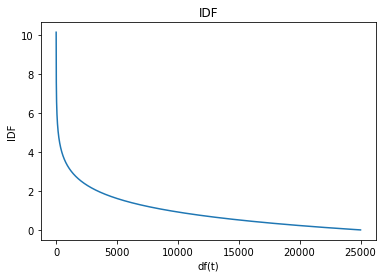

In [12]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

TF-IDFではこの数を出現回数に掛け合わせるので、珍しいトークンの登場に重み付けを行なっていることになります。

### ストップワード
あまりにも頻繁に登場するトークンは、値を小さくするだけでなく、取り除くという前処理を加えることもあります。取り除くもののことを **ストップワード** と呼びます。既存のストップワード一覧を利用したり、しきい値によって求めたりします。

scikit-learnのCountVectorizerでは引数stop_wordsにリストで指定することで処理を行なってくれます。

In [13]:
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,movie,this,very
0,0,0,0,1,1,1,1
1,1,0,1,1,0,1,0
2,0,2,0,0,0,0,3


代表的な既存のストップワード一覧としては、**NLTK** という自然言語処理のライブラリのものがあげられます。あるデータセットにおいては特別重要な意味を持つ単語が一覧に含まれている可能性もあるため、使用する際は中身を確認することが望ましいです。

In [14]:
# はじめて使う場合はストップワードをダウンロード
# import nltk
# stop_words = nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) # 'i', 'me', 'my', ...

stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

逆に、登場回数が特に少ないトークンも取り除くことが多いです。全てのトークンを用いるとベクトルの次元数が著しく大きくなってしまい計算コストが高まるためです。

scikit-learnのCountVectorizerでは引数max_featuresに最大の語彙数を指定することで処理を行なってくれます。以下の例では出現数が多い順に5個でベクトル化しています。

In [15]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,bad,good,is,this,very
0,0,1,1,1,1
1,0,1,1,1,0
2,2,0,0,0,3


## 【問題2】TF-IDFの計算
IMDB映画レビューデータセットをTF-IDFによりベクトル化してください。NLTKのストップワードを利用し、最大の語彙数は5000程度に設定してください。テキストクリーニングやステミングなどの前処理はこの問題では要求しません。

TF-IDFの計算にはscikit-learnの以下のどちらかのクラスを使用してください。

[sklearn.feature_extraction.text.TfidfVectorizer — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
[sklearn.feature_extraction.text.TfidfTransformer — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)

なお、scikit-learnでは標準的な式とは異なる式が採用されています。

また、デフォルトでは`norm="l2"`の引数が設定されており、各サンプルにL2正規化が行われます。`norm=None`とすることで正規化は行われなくなります。

Term Frequency:

$$
tf(t,d) = n_{t,d}
$$

$n_{t,d}$ : サンプルd内のトークンtの出現回数

scikit-learnのTFは分母がなくなりBoWと同じ計算になります。

Inverse Document Frequency:

$$
idf(t) = \log{\frac{1+N}{1+df(t)}}+1
$$

$N$ : サンプル数

$df(t)$ : トークンtが出現するサンプル数

＊logの底はネイピア数e

詳細は以下のドキュメントを確認してください。

[5.2.3.4. Tf–idf term weighting — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting)

In [16]:
type(x_train), x_train[0]

(list,
 "Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.")

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(token_pattern=r'\b\w+\b', stop_words=stop_words, max_features=5000, norm=None)
X_train = (tfidf_vectorizer.fit_transform(x_train)).toarray()

In [18]:
X_train_df = pd.DataFrame(X_train, columns=tfidf_vectorizer.get_feature_names())
X_train_df.head()

,0,00,000,1,10,100,11,12,13,13th,...,york,young,younger,youth,z,zero,zizek,zombie,zombies,zone
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,6.437303,0.0,0.0,0.0,5.35835,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,2.998676,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.998676,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [19]:
X_train_df.sum()

0           1351.020957
00           624.955523
000         1718.552520
1           8088.839058
10         13047.239482
               ...     
zero        2057.606441
zizek        715.582777
zombie      3942.408052
zombies     2887.182566
zone         913.261818
Length: 5000, dtype: float64

## 【問題3】TF-IDFを用いた学習
問題2で求めたベクトルを用いてIMDB映画レビューデータセットの学習・推定を行なってください。モデルは2値分類が行える任意のものを利用してください。

ここでは精度の高さは求めませんが、最大の語彙数やストップワード、n-gramの数を変化させて影響を検証してみてください。

In [20]:
# ロジスティック回帰でモデル設定
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# 正答率の計算式
from sklearn.metrics import accuracy_score
def score_calc(y, y_pred):
    accuracy = accuracy_score(y, y_pred)
    print('Accuracy = {}'.format(accuracy))

In [21]:
# l2正則化、NLTKのstopwordを使用, max_featuresを1000, 3000, 5000, 10000と変えて検証
from tqdm import tqdm
for max_features in tqdm([1000, 3000, 5000, 10000]):
    print('max_features : {}'.format(max_features))
    tfidf_vectorizer = TfidfVectorizer(token_pattern=r'\b\w+\b', stop_words=stop_words, max_features=max_features, norm='l2')
    X_train = (tfidf_vectorizer.fit_transform(x_train)).toarray()
    X_test = (tfidf_vectorizer.fit_transform(x_test)).toarray()
    y_pred = lr.fit(X_train, y_train).predict(X_test)
    score_calc(y_test, y_pred)

  0%|          | 0/4 [00:00<?, ?it/s]

max_features : 1000


 25%|██▌       | 1/4 [00:08<00:25,  8.43s/it]

Accuracy = 0.693
max_features : 3000


 50%|█████     | 2/4 [00:20<00:18,  9.42s/it]

Accuracy = 0.64556
max_features : 5000


 75%|███████▌  | 3/4 [00:35<00:11, 11.18s/it]

Accuracy = 0.53532
max_features : 10000


100%|██████████| 4/4 [00:58<00:00, 14.51s/it]

Accuracy = 0.54956


## 【問題4】TF-IDFのスクラッチ実装
以下の3文のTF-IDFを求められるプログラムをscikit-learnを使わずに作成してください。標準的な式と、scikit-learnの採用している式の2種類を作成してください。正規化は不要です。
```
This movie is SOOOO funny!!!
What a movie! I never
best movie ever!!!!! this movie
```

In [22]:
import re
import pandas as pd
from collections import defaultdict

class ScratchTFIDF:
    def __init__(self, token_pattern=r'(?u)\b\w\w+\b', ngram_range=(1, 1), calc_option='standard'):
        self.token_pattern = token_pattern
        self.ngram_range = ngram_range
        self.calc_option = calc_option
    
    def fit_transform(self, dataset):
        '''
        dataset : 文のリスト　str
        '''
        # スクラッチしたBoWクラスを呼び出し
        bow = ScratchBoW(token_pattern=self.token_pattern, ngram_range=self.ngram_range)
        bow_df = bow.fit_transform(dataset)
        
        #トークンの出現回数
        nt = bow_df.values
        #サンプル毎のトークンの出現回数の合計
        ns = nt.sum(axis=1).reshape(-1, 1)
        
        # サンプル数
        N, _ = nt.shape
        # トークンtが出現するサンプル数
        df = np.where(nt > 0, True, False).sum(axis=0)
        
        if self.calc_option == 'standard':
            # TermFrequency
            tf = nt / ns
            # InverseDocumentFrequency
            idf = np.log(N/df)
        elif self.calc_option == 'sklearn':
            # TermFrequency
            tf = nt
            # InverseDocumentFrequency
            idf = np.log((1+N)/(1+df))+1
        # TF-IDF
        tfidf = tf * idf
        tfidf_df = pd.DataFrame(tfidf, columns=bow_df.columns)
        return tfidf_df

In [23]:
# 計算オプションを標準式
tfidf= ScratchTFIDF(token_pattern=r'(?u)\b\w+\b', ngram_range=(1, 1), calc_option='standard')
tfidf_df = tfidf.fit_transform(dataset)
tfidf_df

,this,movie,is,soooo,funny,what,a,i,never,best,ever
0,0.081093,0.0,0.219722,0.219722,0.219722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.000000,0.000000,0.000000,0.219722,0.219722,0.219722,0.219722,0.000000,0.000000
2,0.081093,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.219722,0.219722


In [24]:
# 計算オプションをsklearn
tfidf= ScratchTFIDF(token_pattern=r'(?u)\b\w+\b', ngram_range=(1, 1), calc_option='sklearn')
tfidf_df = tfidf.fit_transform(dataset)
tfidf_df.head()

,this,movie,is,soooo,funny,what,a,i,never,best,ever
0,1.287682,1.0,1.693147,1.693147,1.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.0,0.000000,0.000000,0.000000,1.693147,1.693147,1.693147,1.693147,0.000000,0.000000
2,1.287682,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.693147,1.693147


In [25]:
# sklearnからオブジェクトを呼び出し、正しく動作しているか確認
tfidf_vectorizer = TfidfVectorizer(token_pattern=r'\b\w+\b', norm=None)
dataset_array = (tfidf_vectorizer.fit_transform(dataset)).toarray()
pd.DataFrame(dataset_array, columns=tfidf_vectorizer.get_feature_names())

,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0.000000,0.000000,0.000000,1.693147,0.000000,1.693147,1.0,0.000000,1.693147,1.287682,0.000000
1,1.693147,0.000000,0.000000,0.000000,1.693147,0.000000,1.0,1.693147,0.000000,0.000000,1.693147
2,0.000000,1.693147,1.693147,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,1.287682,0.000000


## 7.Word2Vec

ニューラルネットワークを用いてベクトル化を行う手法が **Word2Vec** です。

BoWやTF-IDFはone-hot表現であったため、得られるベクトルの次元は語彙数分になります。そのため、語彙数を増やしにくいという問題があります。一方で、Word2Vecでは単語を任意の次元のベクトルに変換します。これをを **Word Embedding（単語埋め込み）** や **分散表現** と呼びます。変換操作を「ベクトル空間に埋め込む」と言うことが多いです。

Word2VecにはCBoWとSkip-gramという2種類の仕組みがあるため順番に見ていきます。

### CBoW

**CBoW (Continuous Bag-of-Words)** によるWord2Vecではある単語とある単語の間に来る単語を推定できるように全結合層2層のニューラルネットワークを学習します。

単語はコーパスの語彙数次元のone-hot表現を行なっておきます。そのため、入力と出力の次元は語彙数と同じになります。一方で、中間のノード数をWord2Vecにより得たい任意の次元数とします。これにより全結合層の重みは「得たい次元のノード数×語彙数」になります。このネットワークにより学習を行なった後、出力側の重みを取り出すことで、各語彙を表すベクトルを手に入れることができます。

間の単語の推定を行なっているため、同じ箇所で代替可能な言葉は似たベクトルになるというメリットもあります。これはBoWやTF-IDFでは得られない情報です。

あるテキストは「そのテキストの長さ（単語数）×Word2Vecで得た分散表現の次元数」の配列になりますが、各入力の配列を揃える必要があるモデルに入力するためには、短いテキストは空白を表す単語を加える **パディング** を行なったり、長いテキストは単語を消したりします。テキストを **固定長** にすると呼びます。

### ウィンドウサイズ
入力する単語は推定する前後1つずつだけでなく、複数個とする場合もあります。前後いくつを見るかの大きさを **ウィンドウサイズ** と呼びます。

### Skip-gram
CBoWとは逆にある単語の前後の単語を推定できるように全結合層2層のニューラルネットワークを学習する方法が **Skip-gram** です。学習を行なった後は入力側の重みを取り出し各語彙を表すベクトルとします。現在一般的に使われているのはCBoWよりもSki-gramです。

### 利用方法

Pythonでは **Gensim** ライブラリを用いて扱うことができます。

[gensim: models.word2vec – Word2vec embeddings](https://radimrehurek.com/gensim/models/word2vec.html)

BoWの例と同じ文章で学習してみます。CountVectorizerと異なり前処理を自動的に行なってはくれないため、単語（トークン）はリストで分割しておきます。また、大文字は小文字に揃え、記号は取り除きます。

デフォルトのパラメータではCBoWで計算されます。また、ウィンドウサイズは`window=5`に設定されています。

In [26]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) # 学習
print("語彙の一覧 : {}".format(model.wv.vocab.keys()))
for vocab in model.wv.vocab.keys():
    print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

語彙の一覧 : dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
thisのベクトル : 
[ 0.04716365 -0.0228503  -0.03568754 -0.00812698  0.0027041   0.01652161
  0.0326538   0.03689947 -0.0011913   0.04246002]
movieのベクトル : 
[ 0.00680368 -0.04936711 -0.02091898 -0.03632329  0.03529257  0.01786867
 -0.0431168   0.04397044  0.02608564  0.02088387]
isのベクトル : 
[-0.00869658 -0.02806871  0.02737118 -0.01457878  0.01135876 -0.02386959
 -0.03136011 -0.01337958  0.04119992 -0.04581876]
veryのベクトル : 
[-1.4606207e-02  9.4950451e-03  4.9489181e-02 -5.7234857e-03
 -2.5195019e-02  1.1980261e-02  3.8923386e-02  2.5624514e-03
  1.4949583e-02 -5.7132496e-05]
goodのベクトル : 
[ 0.01266583  0.0436265   0.00918761  0.04699462 -0.00890453 -0.04866716
 -0.00913026 -0.00886705  0.03093852  0.00653509]
filmのベクトル : 
[ 0.04871902  0.00759825 -0.03703598 -0.03068539  0.00342643  0.0029874
  0.0217225  -0.01768799 -0.03671515  0.00928326]
aのベクトル : 
[ 0.04170216 -0.03794052  0.01586927  0.04929311  0.01339484  0.01

/Users/ikeda/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


このようにしてベクトルが得られます。

### 単語の距離
ベクトル間で計算を行うことで、ある単語に似たベクトルを持つ単語を見つけることができます。例えばgoodに似たベクトルの単語を3つ探します。

In [27]:
model.wv.most_similar(positive="good", topn=3)

[('bad', 0.14578573405742645),
 ('a', 0.11342328786849976),
 ('is', 0.08708494156599045)]

今の例では3文しか学習していませんので効果を発揮しませんが、大きなコーパスで学習することで、並列関係のものが近くに来たりなど面白い結果が得られます。

### 可視化
2次元に圧縮することで単語ごとの位置関係を可視化することができます。以下はt-SNEを用いた例です。

/Users/ikeda/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


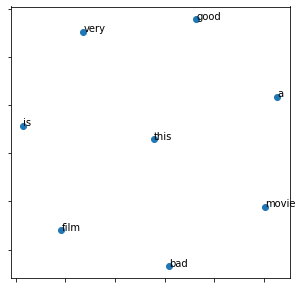

In [28]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = model.wv.vocab.keys()
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

In [29]:
del model

### 8.IMDB映画レビューデータセットの分散表現

IMDB映画レビューデータセットの訓練データをコーパスとしてWord2Vecを学習させ分散表現を獲得しましょう。

### 【問題5】コーパスの前処理
コーパスの前処理として、特殊文字（!など）やURLの除去、大文字の小文字化といったことを行なってください。また、単語（トークン）はリストで分割してください。

- 参考記事　[ディープラーニングで多クラス文書分類を実装](https://lionbridge.ai/ja/articles/deep-learning-multiclass-text-classification/)

In [30]:
# 短縮形のパターンを取得する
shortened_pattern = r'(?u)\w+\'+\w'
shortened_pattern = re.compile(shortened_pattern)
shortened_list = []
for sentence in x_train:
    shortened = shortened_pattern.findall(sentence)
    shortened_list += shortened
shortened = set(shortened_list)
print(len(shortened))

7965


In [31]:
# https://agreatdream.com/list-of-contractions/
# 英語の短縮形パターンを全部取り出す、is, has, had, wouldなど被っているパターンもあるが一旦無視

contraction_dict = {"I'm" :"I am", 
                    "I'll": "I will",
                    "I'd":"I would",
                    "I've":"I have",
                    "I'd":"I had",
                    "you're":"you are",
                    "you'll":"you will",
                    "you'd":"you would",
                    "you've":"you have",
                    "you'd":"you had",
                    "he's":"he is",
                    "he'll":"he will",
                    "he'd":"he would",
                    "he's":"he has",
                    "he'd":"he had",
                    "she's":"she is",
                    "she'll":"she will",
                    "she'd":"she would",
                    "she's":"she has",
                    "she'd":"she had",
                    "it's":"it is",
                    "'tis":"it is",
                    "it'll":"it will",
                    "it'd":"it would",
                    "it's":"it has",
                    "it'd":"it had",
                    "we're":"we are",
                    "we'll":"we will",
                    "we'd":"we would",
                    "we've":"we have",
                    "we'd":"we had",
                    "they're":"they are",
                    "they'll":"they will",
                    "they'd":"they would",
                    "they've":"they have",
                    "they'd":"they had",
                    "that's":"that is",
                    "that'll":"that will",
                    "that'd":"that would",
                    "that's":"that has",
                    "that'd":"that had",
                    "who's":"who is",
                    "who'll":"who will",
                    "who'd":"who would",
                    "who's":"who has",
                    "who'd":"who had",
                    "what's":"what is",
                    "what're":"what are",
                    "what'll":"what will",
                    "what'd":"what would",
                    "what's":"what has",
                    "what'd":"what had",
                    "where's":"where is",
                    "where'll":"where will",
                    "where'd":"where would",
                    "where's":"where has",
                    "where'd":"where had",
                    "when's":"when is",
                    "when'll":"when will",
                    "when'd":"when would",
                    "when's":"when has",
                    "when'd":"when had",
                    "why's":"why is",
                    "why'll":"why will",
                    "why'd":"why would",
                    "why's":"why has",
                    "why'd":"why had",
                    "how's":"how is",
                    "how'll":"how will",
                    "how'd":"how would",
                    "how's":"how has",
                    "how'd":"how had",
                    "isn't":"is not",
                    "aren't":"are not",
                    "wasn't":"was not",
                    "weren't":"were not",
                    "haven't":"have not",
                    "hasn't":"has not",
                    "hadn't":"had not",
                    "won't":"will not",
                    "wouldn't":"would not",
                    "don't":"do not",
                    "doesn't":"does not",
                    "didn't":"did not",
                    "can't":"can not",
                    "couldn't":"could not",
                    "shouldn't":"should not",
                    "mightn't":"might not",
                    "mustn't":"must not",
                    "would've":"would have",
                    "should've":"should have",
                    "could've":"could have",
                    "might've":"might have",
                    "must've":"must have",
                    "this's":"this is"}

In [32]:
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re
contractions, contractions_re = _get_contractions(contraction_dict)
def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)
# Usage
replace_contractions("this's a text with contraction")

'this is a text with contraction'

- コーパスを作成　以下の処理を実行
    1. htmlタグを消去
    2. URLを消去
    3. 短縮形を変換
    4. 大文字を小文字へ変換
    5. 不要な記号を除去
    6. stop_wordを除去

In [33]:
token_pattern = r'(?u)\b\w+\b'
token_pattern = re.compile(token_pattern)

tag_pattern = r'<.+?>'
tag_pattern = re.compile(tag_pattern)

url_pattern = r'https?://\S+|www\.\S+'
url_pattern = re.compile(url_pattern)

train_corpas = []
for sentence in x_train:
    # タグを消去
    sentence = tag_pattern.sub('', sentence)
    # urlを消去
    sentence = url_pattern.sub('', sentence)
    # 短縮形を変換
    sentence = replace_contractions(sentence)
    # 大文字を小文字へ
    sentence = sentence.lower()
    # 正規表現で変換, return : list
    sentence = token_pattern.findall(sentence)
    # stop_wordsに該当するものを除去
    sentence = [word for word in sentence if word not in stop_words]
    # リストへ格納
    train_corpas.append(sentence)

test_corpas = []
for sentence in x_test:
    # タグを消去
    sentence = tag_pattern.sub('', sentence)
    # urlを消去
    sentence = url_pattern.sub('', sentence)
    # 短縮形を変換
    sentence = replace_contractions(sentence)
    # 大文字を小文字へ
    sentence = sentence.lower()
    # 正規表現で変換, return : list
    sentence = token_pattern.findall(sentence)
    # stop_wordsに該当するものを除去
    sentence = [word for word in sentence if word not in stop_words]
    # リストへ格納
    test_corpas.append(sentence)

In [34]:
# 前処理した結果をランダムで5個表示
import random
random.seed(0)
for text in random.sample(train_corpas, 5):
    print(*text)
    print()

saw long ago must say movie terrible watch crappy movies fun scarecreow fun scarecrow stupid incredibly corny villain enjoys screaming awful puns kills victims actually worse one contained sentence hard luck story uses justify killings everyone picks girl thinks trailer trash likes one guys pick want kill everybody wah ok exaggerating premise movie alone enough put near bottom list crappy movies adding said kid mom promiscuous walks mother current boyfriend getting mom boyfriend tells leave kid refuses insisting going leave house boyfriend chases kid corn field kills kid right front mom mom screams terror boyfriend like omg mean tells mom say anything police kid killed scarecrow though like kid gets murdered scarecrow comes back killer scarecrow vengeance victims stalked like scarecrow official tag line make matters worse movie filmed whopping 8 days right 8 days going give movie 2 spite one two redeeming moments spoilers spoil actually want see crap could somewhat forgiven bad acting 

- wordcloudで出現頻度を可視化
- 参考Kaggle [Basic NLP with TensorFlow and WordCloud](https://www.kaggle.com/marcovasquez/basic-nlp-with-tensorflow-and-wordcloud)

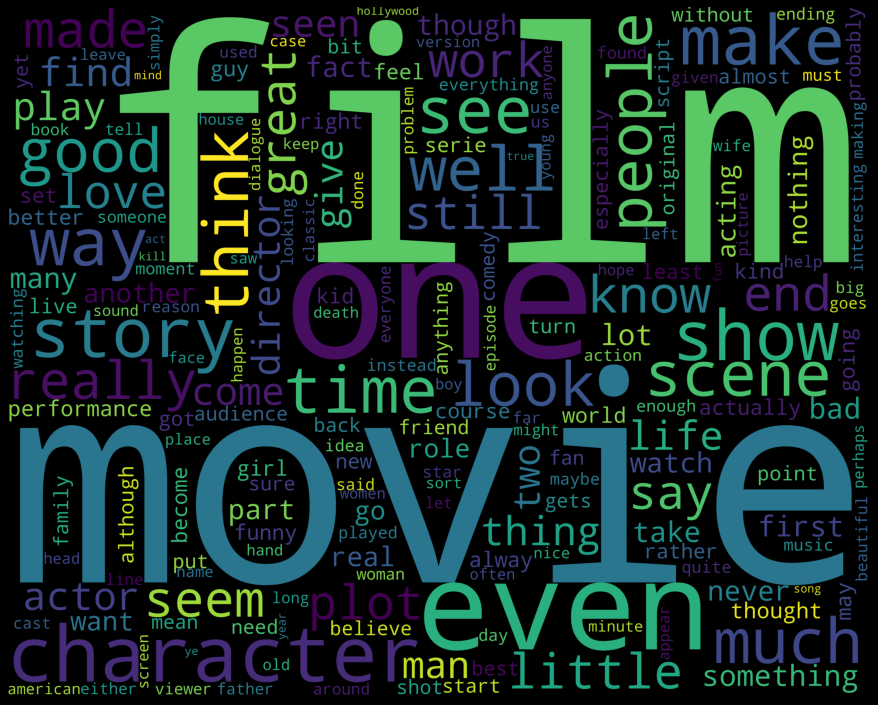

In [35]:
# wordcloudで出現頻度を可視化
train_corpas_str = ''
for sentence in train_corpas:
    train_corpas_str += " ".join(sentence)
    
from wordcloud import WordCloud
wordcloud = WordCloud(width = 5000, height = 4000, 
                    background_color ='black', 
                    min_font_size = 10).generate(train_corpas_str)
# plot the WordCloud image                        
plt.figure(figsize =(12, 12), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
                                                 
plt.show()

### 【問題6】Word2Vecの学習
Word2Vecの学習を行なってください。

In [36]:
from gensim.models import Word2Vec
size = 300 # 次元数を300
sentences = train_corpas
model = Word2Vec(min_count=100, size=size) # 100語以上ある単語に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) # 学習
# print("語彙の一覧 : {}".format(model.wv.vocab.keys()))
print("語彙の数 : {}".format(len(model.wv.vocab.keys())))
# for vocab in model.wv.vocab.keys():
#     print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

/Users/ikeda/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


語彙の数 : 4190


### 【問題7】（アドバンス課題）ベクトルの可視化
得られたベクトルをt-SNEにより可視化してください。また、いくつかの単語を選び`wv.most_similar`を用いて似ている単語を調べてください。

- 参考Kaggle [Gensim Word2Vec Tutorial](https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial)

In [37]:
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, size), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    # reduc = PCA(n_components=50).fit_transform(arrays)
    reduc = arrays
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

In [38]:
random.seed(0)
random_words =  random.sample(model.wv.vocab.keys(), 10)
random_words

['dear',
 'connected',
 'work',
 'bed',
 'oz',
 'susan',
 'accomplished',
 'commented',
 'boxing',
 'topic']

In [39]:
model.wv.most_similar(positive='good', topn=10)

[('decent', 0.6774308681488037),
 ('bad', 0.6659449338912964),
 ('great', 0.6016618013381958),
 ('ok', 0.583389937877655),
 ('alright', 0.5799719095230103),
 ('fine', 0.5686429738998413),
 ('average', 0.5541728138923645),
 ('okay', 0.5513055324554443),
 ('nice', 0.5496248602867126),
 ('lousy', 0.5386375188827515)]

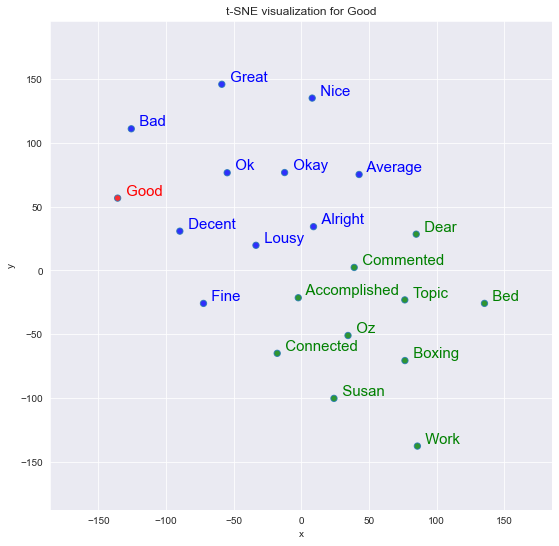

In [40]:
tsnescatterplot(model, 'good', random_words)

In [41]:
model.wv.most_similar(positive=[u'good', u'man'], topn=10)

[('ok', 0.42179059982299805),
 ('decent', 0.4124889373779297),
 ('lady', 0.407717227935791),
 ('guy', 0.4061368703842163),
 ('great', 0.40057486295700073),
 ('bad', 0.36191436648368835),
 ('fine', 0.3566291928291321),
 ('fashioned', 0.3510931134223938),
 ('cool', 0.34558820724487305),
 ('woman', 0.34245064854621887)]

### 学習済みベクトル
巨大なコーパスで学習して得たベクトルも公開されているため、自分で学習をせずに利用することもできます。オリジナルのWord2Vecの他に同じ作者の発展系である `FastText` やスタンフォード大の `GloVe` があり、それぞれ公開されています。

### 【問題8】（アドバンス課題）Word2Vecを用いた映画レビューの分類
問題6で学習して得たベクトルや公開されている学習済みベクトルを用いてIMDB映画レビューデータセットの感情分類の学習・推定を行なってください。

- 各wordのベクトル値の平均を特徴量として学習、推定を行う
- 参考記事　[Word2Vecを使った文章間の類似度算出（簡易版）](https://qiita.com/yoppe/items/512c7c072d08c64afa7e)

#### 問題6で学習して得たベクトルで学習・推定を行う

In [42]:
def generate_X(model, size, train_corpas=train_corpas, test_corpas=test_corpas, train_samples=25000, test_samples=25000):
    X_train = np.zeros((train_samples, size))
    X_test = np.zeros((test_samples, size))
    fitted_words = model.wv.vocab.keys()
    # train
    for i, sentence in enumerate(train_corpas):
        words_cnt = len(sentence)
        for word in sentence:
            if word not in fitted_words:
                words_cnt -= 1
            else:
                X_train[i] += model.wv[word]
        X_train[i] /= words_cnt
    # test
    for i, sentence in enumerate(test_corpas):
        words_cnt = len(sentence)
        for word in sentence:
            if word not in fitted_words:
                words_cnt -= 1
            else:
                X_test[i] += model.wv[word]
        X_test[i] /= words_cnt
    return X_train, X_test

In [43]:
# train, testデータを生成
X_train, X_test = generate_X(model=model, size=size)
del model

In [44]:
# ロジスティック回帰でモデル設定
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# 正答率の計算式
from sklearn.metrics import accuracy_score
def score_calc(y, y_pred):
    accuracy = accuracy_score(y, y_pred)
    print('Accuracy = {}'.format(accuracy))

In [45]:
y_pred = lr.fit(X_train, y_train).predict(X_test)
score_calc(y_test, y_pred)

Accuracy = 0.85608


/Users/ikeda/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### FastTextで学習済のベクトルで学習・推定を行う
- 参考記事　[[python] NLTKとfastTextの学習済みモデルから単語（英文）のベクトルを得る．](https://qiita.com/takayoshiiiiii/items/3cd8c8207fbafe8498e7)
- [公式サイト](https://fasttext.cc/)

In [ ]:
# 以下コードで学習済のベクトル取得
'''
import io
from tqdm import tqdm

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in tqdm(fin):
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = map(float, tokens[1:])
    return data
model = load_vectors('.../wiki-news-300d-1M.vec')
'''

828890it [04:18, 24745.40it/s]

- ローカル環境のメモリが足らないため、ベクトル取得できず。
- 今回の課題ではFastTextで学習済のベクトルを使用しての推定は行わない